# Rob Sandbox
- Tests and trials developed by Rob

# Imports

## Standard library imports

## Local application imports

## Third party imports

In [1]:
import pandas as pd

import numpy as np

import networkx as nx

import scipy.sparse
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt

---

# Reading data 

## Reading data from csv

In [2]:
df = pd.read_csv("Cooffending.csv")

In [3]:
df

,OffenderIdentifier,OffenderGender,CrimeIdentifier,CrimeType1,CrimeType2,CrimeType3,CrimeType4,Municipality,CrimeLocation,NumberYouthOffenders,NumberAdultOffenders,CrimeDate,CrimeYear
0,1,F,1085034,3530.0,NaN,NaN,NaN,58227,2.0,0,1,12/17/2005,2005
1,2,F,1431379,1430.0,NaN,NaN,NaN,94068,5.0,0,1,04/23/2008,2008
2,4,M,167174,1430.0,21702.0,NaN,NaN,49058,2.0,0,1,03/06/2008,2008
3,5,M,1179096,1420.0,NaN,NaN,NaN,65005,71.0,0,1,08/21/2008,2008
4,17,M,1270690,1625.0,NaN,NaN,NaN,23027,NaN,0,3,04/30/2003,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280454,670532,F,1112491,1330.0,NaN,NaN,NaN,58227,34.0,0,1,03/26/2009,2009
1280455,670533,M,78081,21702.0,NaN,NaN,NaN,46075,10.0,0,4,06/29/2009,2009
1280456,670534,M,187904,21201.0,21702.0,NaN,NaN,31015,1.0,0,4,03/16/2009,2009
1280457,670535,M,523837,21704.0,NaN,NaN,NaN,98806,1.0,0,1,10/18/2009,2009


## Initial data exploration

### CrimeIdentifier

#### How many CrimeIds are unique

In [83]:
1 - len(df["CrimeIdentifier"].unique())/len(df["CrimeIdentifier"].notnull())

0.09029808841985565

#### Which crimes have more than one CrimeID?

(array([6., 0., 1., 0., 1., 0., 0., 0., 0., 1.]),
 array([ 51. ,  61.5,  72. ,  82.5,  93. , 103.5, 114. , 124.5, 135. ,
        145.5, 156. ]),
 <BarContainer object of 10 artists>)

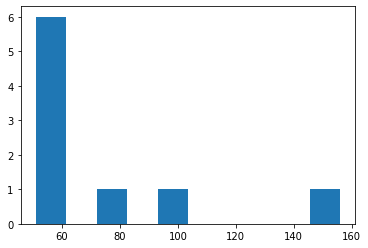

In [142]:
dfx = df["CrimeIdentifier"].value_counts().to_frame()

# x = x[(x["CrimeIdentifier"] > 1) & (x["CrimeIdentifier"] < 10)]
dfx = dfx[(dfx["CrimeIdentifier"] > 50)]

dfx.value_counts()

## Histogram
plt.hist(dfx["CrimeIdentifier"])
# plt.hist(x["CrimeIdentifier"], bins=len(x["CrimeIdentifier"].unique()))

In [130]:
ref_val = 23610
df[df["CrimeIdentifier"] == ref_val]

,OffenderIdentifier,OffenderGender,CrimeIdentifier,CrimeType1,CrimeType2,CrimeType3,CrimeType4,Municipality,CrimeLocation,NumberYouthOffenders,NumberAdultOffenders,CrimeDate,CrimeYear
24205,28212,M,23610,4220.0,42201.0,4320.0,38403.0,78005,0.0,0,51,11/22/2004,2004
25087,29160,M,23610,4220.0,42201.0,4320.0,38403.0,78005,0.0,0,51,11/22/2004,2004
28803,32923,M,23610,4220.0,42201.0,4320.0,38403.0,78005,0.0,0,51,11/22/2004,2004
38286,42330,F,23610,4220.0,42201.0,4320.0,38403.0,78005,0.0,0,51,11/22/2004,2004
41611,45552,M,23610,4220.0,42201.0,4320.0,38403.0,78005,0.0,0,51,11/22/2004,2004
42151,46045,M,23610,4220.0,42201.0,4320.0,38403.0,78005,0.0,0,51,11/22/2004,2004
55524,58312,M,23610,4220.0,42201.0,4320.0,38403.0,78005,0.0,0,51,11/22/2004,2004
76461,76130,M,23610,4220.0,42201.0,4320.0,38403.0,78005,0.0,0,51,11/22/2004,2004
92228,88395,F,23610,4220.0,42201.0,4320.0,38403.0,78005,0.0,0,51,11/22/2004,2004
94692,90248,M,23610,4220.0,42201.0,4320.0,38403.0,78005,0.0,0,51,11/22/2004,2004


### CrimeTypeX

#### How many unique CrimeType1 are there?

In [138]:
len(df["CrimeType1"].unique())

295

In [139]:
len(df["CrimeType2"].unique())

244

In [140]:
len(df["CrimeType3"].unique())

178

In [141]:
len(df["CrimeType4"].unique())

116

### 

#### How many unique municipalities are there?

---

# Analysis 1: Building matrix relating *Crime type* and *Municipality*

In [65]:
dfx = df.copy()

## Defining relevant columns

In [66]:
rc = ["CrimeType1", "Municipality"]
dfx = dfx.loc[:, rc]

## Cleaning and preparing original data

### Eliminating rows with null values

In [67]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280459 entries, 0 to 1280458
Data columns (total 2 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   CrimeType1    1279009 non-null  float64
 1   Municipality  1280459 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 19.5 MB


In [68]:
dfx = dfx.loc[dfx["CrimeType1"].notnull(), :]

### Reindexing and reformatting

In [69]:
for col in dfx.columns:
    dfx[col] = dfx[col].astype("int64")
    dfx[col] = pd.factorize(dfx[col])[0]

### Simplified matrix

In [70]:
dfx = np.column_stack(
    [
        np.ones(dfx.shape[0], dtype=int),
        np.array(dfx["CrimeType1"]),
        np.array(dfx["Municipality"])
    ]
)

dfx.shape

(1279009, 3)

### Data as sparse matrix

In [50]:
crime_matrix = csr_matrix(
    (
        dfx[:, 0].sum(),
        (dfx[:, 1], dfx[:, 2])
    ),
    shape=(
        dfx[:, 1].max() + 1,
        dfx[:, 2].max() + 1
    )
)

### Adjacency matrix

In [52]:
A = crime_matrix*crime_matrix.T 

---

## 

---
---